In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/Felle/OneDrive/Dokument/Studier/VT-23/2dv516/ass1/microchips.csv', header=None, names=['Test1', 'Test2', 'Class'])

In [3]:
ok_data = data[data['Class'] == 1]
fail_data = data[data['Class'] == 0]

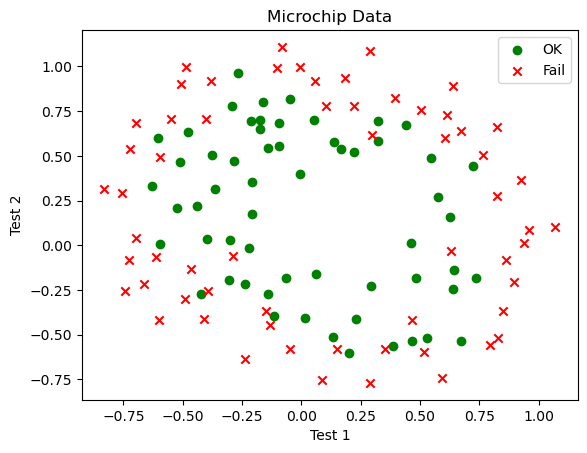

In [4]:
plt.scatter(ok_data['Test1'], ok_data['Test2'], marker='o', color='green', label='OK')
plt.scatter(fail_data['Test1'], fail_data['Test2'], marker='x', color='red', label='Fail')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Microchip Data')
plt.legend()
plt.show()

In [5]:
# Define a function to compute the Euclidean distance between two points
def euclidean_distance(point1, point2):
    squared_distance = 0
    for i in range(len(point1)):
        squared_distance += (point1[i] - point2[i]) ** 2
    distance = math.sqrt(squared_distance)
    return distance

# Define a function to find the k nearest neighbors of a test point
def find_neighbors(train_data, test_point, k):
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(train_data[i][:2], test_point)
        distances.append((train_data[i], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors

# Define a function to make a prediction based on the k nearest neighbors
def predict_class(neighbors):
    class_counts = {0: 0, 1: 0}
    for neighbor in neighbors:
        class_counts[neighbor[2]] += 1
    predicted_class = max(class_counts, key=class_counts.get)
    return predicted_class

In [6]:
# Create the feature matrix X and target vector y
train_data = data.values
X = train_data[:, :-1]
y = train_data[:, -1]

# Define the test points
test_points = [[-0.3, 1.0], [-0.5, -0.1], [0.6, 0.0]]

# Define the values of k to use
k_values = [1, 3, 5, 7]

# Loop over the values of k and make predictions for each test point
for k in k_values:
    print(f'k = {k}')
    for i, point in enumerate(test_points):
        neighbors = find_neighbors(train_data, point, k)
        predicted_class = predict_class(neighbors)
        if predicted_class == 0:
            print(f'chip{i+1}: {point} ==> Fail')
        else:
            print(f'chip{i+1}: {point} ==> OK')

k = 1
chip1: [-0.3, 1.0] ==> OK
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> Fail
k = 3
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> OK
k = 5
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> OK
chip3: [0.6, 0.0] ==> OK
k = 7
chip1: [-0.3, 1.0] ==> Fail
chip2: [-0.5, -0.1] ==> Fail
chip3: [0.6, 0.0] ==> OK


In [7]:
# Define a function to plot the decision boundary and training error for a given value of k

# Fit the k-NN model on the training data
train_data = np.hstack((X, y.reshape(-1, 1)))
test_data = train_data
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for i in range(len(xx)):
    for j in range(len(xx[i])):
        point = [xx[i][j], yy[i][j]]
        neighbors = find_neighbors(train_data, point, k)
        predicted_class = predict_class(neighbors)
        Z.append(predicted_class)
Z = np.array(Z)
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'Decision boundary for k = 7')

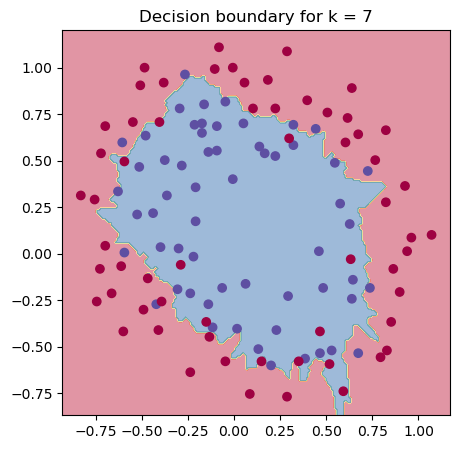

In [8]:
    # Plot the decision boundary
    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision boundary for k = ' + str(k))